In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller
from math import sqrt
from sklearn.metrics import r2_score , mean_absolute_error , mean_absolute_percentage_error , mean_squared_error
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('USD_to_INR_dataset.csv')
df.head()

,Dates,PX_BID,LAST_PRICE,CHG_PCT_1D
0,03-01-2011,44.710,44.7150,0.0224
1,04-01-2011,44.980,44.9850,0.6038
2,05-01-2011,45.320,45.3300,0.7669
3,06-01-2011,45.245,45.2525,-0.1710
4,07-01-2011,45.380,45.3850,0.2928


In [3]:
df.shape

(3202, 4)

In [4]:
df.isnull().sum()

Dates         0
PX_BID        0
LAST_PRICE    1
CHG_PCT_1D    1
dtype: int64

In [5]:
df.dtypes

Dates          object
PX_BID        float64
LAST_PRICE    float64
CHG_PCT_1D    float64
dtype: object

In [7]:
df.set_index('Dates',inplace = True)

In [8]:
df.head()

,PX_BID,LAST_PRICE,CHG_PCT_1D
Dates,,,
03-01-2011,44.710,44.7150,0.0224
04-01-2011,44.980,44.9850,0.6038
05-01-2011,45.320,45.3300,0.7669
06-01-2011,45.245,45.2525,-0.1710
07-01-2011,45.380,45.3850,0.2928


In [11]:
data = df.drop(['PX_BID','CHG_PCT_1D'],axis=1)

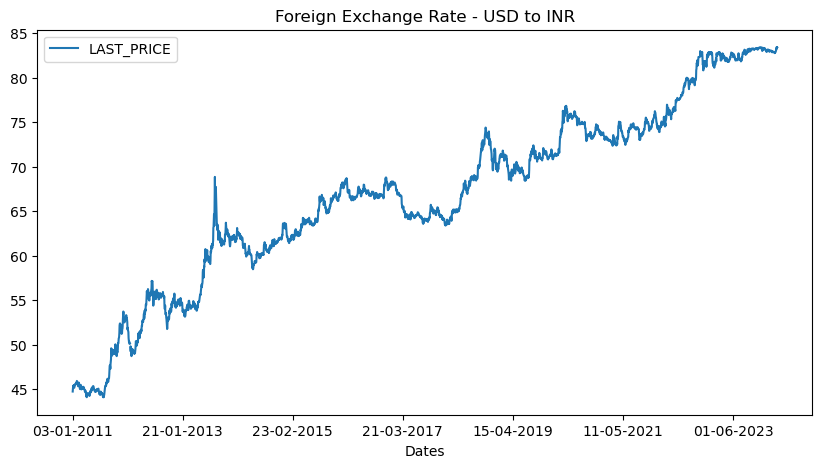

In [12]:
data.plot(figsize = (10,5))
plt.title('Foreign Exchange Rate - USD to INR')
plt.savefig('USD_to_INR.png')
plt.show()

In [16]:
data.index = pd.to_datetime(data.index)


In [17]:
df_year = data.resample('Y').mean()
print('Count of The Yearly Data Frame : ',df_year.shape[0])
df_year.head()

Count of The Yearly Data Frame :  14


,LAST_PRICE
Dates,
2011-12-31,46.718829
2012-12-31,53.483900
2013-12-31,58.600624
2014-12-31,61.031579
2015-12-31,64.153396


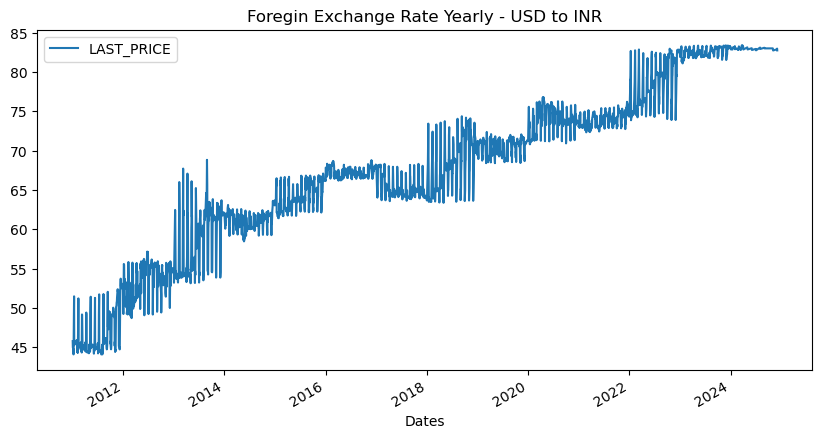

In [18]:
data.plot(figsize = (10,5))
plt.title('Foregin Exchange Rate Yearly - USD to INR')
plt.savefig('USD_to_INR_yearly.png')
plt.show()

In [19]:
df_month = data.resample('M').mean()
print('Count of The Monthly Data Frame : ',df_month.shape[0])
df_month.head()

Count of The Monthly Data Frame :  168


,LAST_PRICE
Dates,
2011-01-31,45.880832
2011-02-28,45.781482
2011-03-31,45.285518
2011-04-30,45.058153
2011-05-31,45.594950


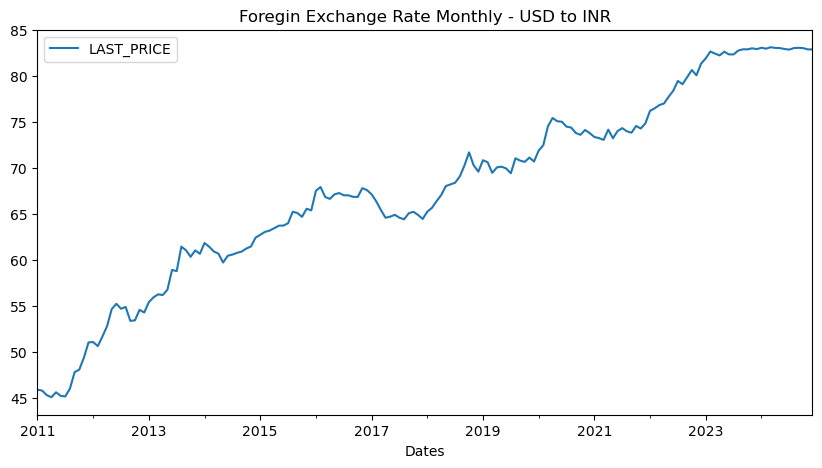

In [20]:
df_month.plot(figsize = (10,5))
plt.title('Foregin Exchange Rate Monthly - USD to INR')
plt.savefig('USD_to_INR_monthly')
plt.show()

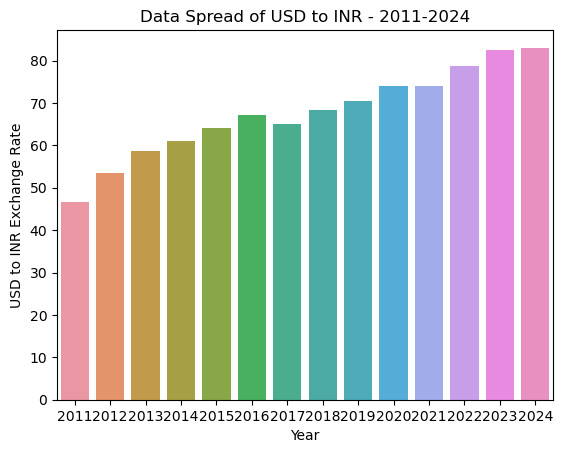

<Figure size 1200x800 with 0 Axes>

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'USD_to_INR' is the column containing exchange rate data
sns.barplot(data=df_year, x=df_year.index.year, y='LAST_PRICE')
plt.title('Data Spread of USD to INR - 2011-2024')
plt.xlabel('Year')
plt.ylabel('USD to INR Exchange Rate')
plt.savefig('Data_Spread.png')
plt.figure(figsize=(12, 8)) 
plt.show()


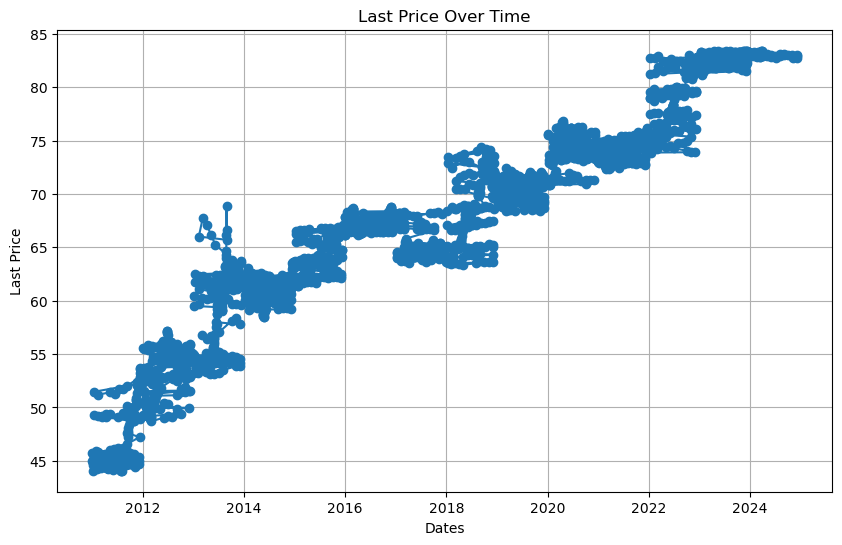

In [34]:
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['LAST_PRICE'], marker='o', linestyle='-')
plt.title('Last Price Over Time')
plt.xlabel('Dates')
plt.ylabel('Last Price')
plt.grid(True)
plt.savefig('Last_Price_Over_Time.png')
plt.show()

In [35]:
model = auto_arima(df_month , m = 12, d = 1 ,seasonal = False , max_order = 8 , test = 'adf' , trace = True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.67 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=358.050, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=359.762, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=359.762, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=372.077, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=361.312, Time=0.22 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 1.151 seconds


In [36]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  168
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -177.025
Date:                Thu, 02 May 2024   AIC                            358.050
Time:                        23:43:35   BIC                            364.286
Sample:                    01-31-2011   HQIC                           360.581
                         - 12-31-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2217      0.058      3.797      0.000       0.107       0.336
sigma2         0.4878      0.049      9.968      0.000       0.392       0.584
===================================================================================
Ljung-Box (L1) (Q):                   0.29   Jarque-Bera (JB):                15.22
Prob(Q):                              0.59   Prob(JB):                         0.00
Heteroskedasticity (H):               0.39   Skew:                             0.63
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [37]:
model = ARIMA(df_month , order = (0,1,1))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             LAST_PRICE   No. Observations:                  168
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -183.796
Date:                Thu, 02 May 2024   AIC                            371.592
Time:                        23:45:05   BIC                            377.828
Sample:                    01-31-2011   HQIC                           374.123
                         - 12-31-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.1159      0.080      1.456      0.145      -0.040       0.272
sigma2         0.5290      0.045     11.739      0.000       0.441       0.617
===================================================================================
Ljung-Box (L1) (Q):                   0.92   Jarque-Bera (JB):                15.75
Prob(Q):                              0.34   Prob(JB):                         0.00
Heteroskedasticity (H):               0.37   Skew:                             0.63
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [39]:
df1_month = df_month.diff().dropna()
print('Count of weekly First Difference',df1_month.shape[0])
df1_month.head()

Count of weekly First Difference 167


,LAST_PRICE
Dates,
2011-02-28,-0.099349
2011-03-31,-0.495964
2011-04-30,-0.227366
2011-05-31,0.536797
2011-06-30,-0.388740


In [40]:
predictions = result.predict(typ = 'levels')

In [45]:
Final_data = pd.concat([df_month,df1_month,predictions],axis=1)
Final_data.columns = ['Foreign Exchange Rate (Monthly)','Monthly First Difference','Predicted Exchange Rate']
Final_data.to_csv('Foreign Exchange Rate with Prediction (Euro To USD).csv')
Final_data.head()

,Foreign Exchange Rate (Monthly),Monthly First Difference,Predicted Exchange Rate
Dates,,,
2011-01-31,45.880832,NaN,0.000000
2011-02-28,45.781482,-0.099349,45.880834
2011-03-31,45.285518,-0.495964,45.770123
2011-04-30,45.058153,-0.227366,45.229375
2011-05-31,45.594950,0.536797,45.038313


In [43]:
Final_data.tail()

,Foreign Exchange Rate (weekly),Weekly First Difference,Predicted Exchange Rate
Dates,,,
2024-08-31,83.045000,0.168100,82.870678
2024-09-30,83.073750,0.028750,83.065199
2024-10-31,83.037500,-0.036250,83.074741
2024-11-30,82.899400,-0.138100,83.033185
2024-12-31,82.899167,-0.000233,82.883898


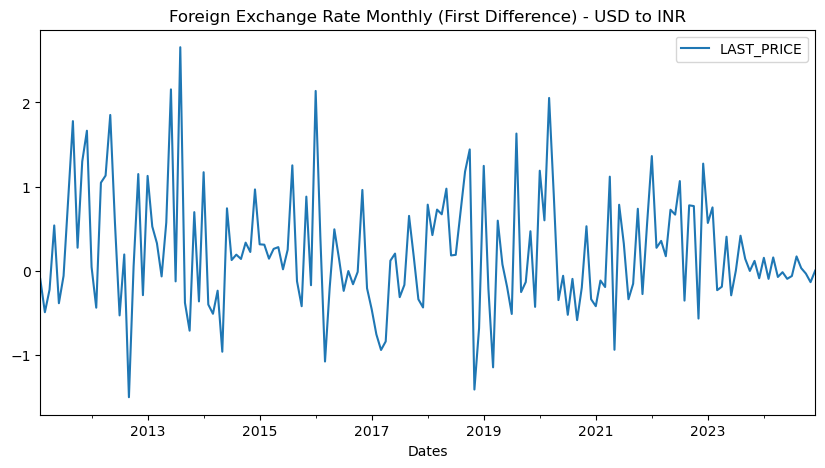

In [46]:
df1_month.plot(figsize = (10,5))
plt.title('Foreign Exchange Rate Monthly (First Difference) - USD to INR')
plt.show()